# What is the best price?

You work as an analyst for the telecommunications operator Megaline. The company offers its clients two prepaid rates, Surf and Ultimate. The commercial department wants to know which of the rates generates the most income in order to adjust the advertising budget.

You are going to perform a preliminary analysis of rates based on a relatively small selection of customers. You will have data on 500 Megaline customers: who the customers are, where they are from, what rate they use, as well as the number of calls they made and text messages they sent in 2018. Your job is to analyze customer behavior and Determine which prepaid rate generates the most revenue.

In [1]:
#Load all libraries
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
# Load the data files into different DataFrames
df_calls =pd.read_csv('datasets/megaline_calls.csv')
df_internet =pd.read_csv('datasets/megaline_internet.csv')
df_messages =pd.read_csv('datasets/megaline_messages.csv')
df_plans = pd.read_csv('datasets/megaline_plans.csv')
df_users =pd.read_csv('datasets/megaline_users.csv')

In [3]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Print a sample of the data for the rates
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [5]:
# Prints the general/summary information about the users DataFrame
df_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# Print a sample of data for usersdf_users.head()s

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


The dataframe seems to have missing data in the churn_date column and the data type for the reg_date column does not seem correct for the dates

### Correct the data

In [7]:
#missing_values = df_users.isnull().sum()
#print(missing_values)
df_users['churn_date'].fillna('unknown', inplace=True)
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])

### Enrich data

## Calls

In [8]:
# Prints the general/summary information about the DataFrame of the calls
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [10]:
# Print a sample of data for calls

df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


The dataframe seems to not have the data type in call_date well represented

### Correct the data

[Correct obvious problems with the data based on initial observations.]

In [9]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])


### Enrich data

## Messages

In [10]:
# Prints the general/summary information about the DataFrame of the messagesdf_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [11]:
# Print a sample of data for messagesdf_messages.head()


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


The dataframe appears to be well structured and without missing data

### Correct the data

In [12]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enrich data

## Internet

In [13]:
# Prints general/summary information about the Internet DataFrame
df_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [14]:
# Print a sample of data for internet traffic
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


The dataframe seems to not have the data type well represented in session_date

### Correct the data### Corregir los datos

[Correct obvious problems with the data based on initial observations.]

In [15]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])


### Enrich data

## Study the rate conditions

In [16]:
# Print the rate conditions and make sure they are clear to you
df_plans.info()
df_plans.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Add data per user

[Now that the data is clean, add the data per user and per period so that there is only one record per user and per period. This will make subsequent analysis much easier.]

In [17]:
# Calculate the number of calls made by each user per month. Save the result.df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls['month'] = df_calls['call_date'].dt.month

calls_per_month = df_calls.groupby(['user_id', 'month']).size().reset_index(name='calls_count')

print(calls_per_month)

      user_id  month  calls_count
0        1000     12           16
1        1001      8           27
2        1001      9           49
3        1001     10           65
4        1001     11           64
...       ...    ...          ...
2253     1498     12           39
2254     1499      9           41
2255     1499     10           53
2256     1499     11           45
2257     1499     12           65

[2258 rows x 3 columns]


In [18]:
# Calculates the number of minutes used by each user per month. Save the result.df_calls['month'] = pd.to_datetime(df_calls['call_date']).dt.to_period('M')
minutes_per_user_per_month_calls = df_calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()

df_internet['month'] = pd.to_datetime(df_internet['session_date']).dt.to_period('M')
mb_per_user_per_month_internet = df_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()

print(minutes_per_user_per_month_calls)
print(mb_per_user_per_month_internet)

      user_id    month  duration
0        1000  2018-12    116.83
1        1001  2018-08    171.14
2        1001  2018-09    297.69
3        1001  2018-10    374.11
4        1001  2018-11    404.59
...       ...      ...       ...
2253     1498  2018-12    324.77
2254     1499  2018-09    330.37
2255     1499  2018-10    363.28
2256     1499  2018-11    288.56
2257     1499  2018-12    468.10

[2258 rows x 3 columns]
      user_id    month   mb_used
0        1000  2018-12   1901.47
1        1001  2018-08   6919.15
2        1001  2018-09  13314.82
3        1001  2018-10  22330.49
4        1001  2018-11  18504.30
...       ...      ...       ...
2272     1498  2018-12  23137.69
2273     1499  2018-09  12984.76
2274     1499  2018-10  19492.43
2275     1499  2018-11  16813.83
2276     1499  2018-12  22059.21

[2277 rows x 3 columns]


In [19]:
# Calculates the number of messages sent by each user per month. Save the result.
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])

df_users['reg_month'] = df_users['reg_date'].dt.to_period('M')

messages_per_user_per_month = df_messages.groupby(['user_id', df_messages['message_date'].dt.to_period('M')])['id'].count().reset_index()
messages_per_user_per_month = messages_per_user_per_month.rename(columns={'id': 'messages_count'})

print(messages_per_user_per_month.head())

   user_id message_date  messages_count
0     1000      2018-12              11
1     1001      2018-08              30
2     1001      2018-09              44
3     1001      2018-10              53
4     1001      2018-11              36


In [20]:
# Calculates the volume of Internet traffic used by each user per month. Save the result.
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
df_internet['month'] = df_internet['session_date'].dt.month
internet_traffic_per_user_per_month = df_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()

print(internet_traffic_per_user_per_month)

      user_id  month   mb_used
0        1000     12   1901.47
1        1001      8   6919.15
2        1001      9  13314.82
3        1001     10  22330.49
4        1001     11  18504.30
...       ...    ...       ...
2272     1498     12  23137.69
2273     1499      9  12984.76
2274     1499     10  19492.43
2275     1499     11  16813.83
2276     1499     12  22059.21

[2277 rows x 3 columns]


In [21]:
# Merge call, minute, message and internet data based on user_id and monthdf_calls_minutes = pd.merge(df_calls, df_internet, on=['user_id', 'id'], how='outer')
df_calls_minutes_messages = pd.merge(df_calls_minutes, df_messages, on=['user_id', 'id'], how='outer')
df_merged = pd.merge(df_calls_minutes_messages, df_users, on='user_id', how='outer')

print(df_merged.head())

         id  user_id  call_date  duration  month_x session_date  mb_used  \
0   1000_93     1000 2018-12-27      8.52  2018-12          NaT      NaN   
1  1000_145     1000 2018-12-27     13.66  2018-12          NaT      NaN   
2  1000_247     1000 2018-12-27     14.48  2018-12          NaT      NaN   
3  1000_309     1000 2018-12-28      5.76  2018-12          NaT      NaN   
4  1000_380     1000 2018-12-30      4.22  2018-12          NaT      NaN   

   month_y message_date first_name last_name  age  \
0      NaN          NaT   Anamaria     Bauer   45   
1      NaN          NaT   Anamaria     Bauer   45   
2      NaN          NaT   Anamaria     Bauer   45   
3      NaN          NaT   Anamaria     Bauer   45   
4      NaN          NaT   Anamaria     Bauer   45   

                                    city   reg_date      plan churn_date  \
0  Atlanta-Sandy Springs-Roswell, GA MSA 2018-12-24  ultimate    unknown   
1  Atlanta-Sandy Springs-Roswell, GA MSA 2018-12-24  ultimate    unknown

In [22]:
# Add rate information
df_tarifa = pd.merge(df_merged, df_plans, left_on='plan', right_on='plan_name', how='left')
df_tarifa = df_tarifa.drop(['plan_name'], axis=1)

display(df_tarifa.head())


,id,user_id,call_date,duration,month_x,session_date,mb_used,month_y,message_date,first_name,...,plan,churn_date,reg_month,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000_93,1000,2018-12-27,8.52,2018-12,NaT,NaN,NaN,NaT,Anamaria,...,ultimate,unknown,2018-12,1000,30720,3000,70,7,0.01,0.01
1,1000_145,1000,2018-12-27,13.66,2018-12,NaT,NaN,NaN,NaT,Anamaria,...,ultimate,unknown,2018-12,1000,30720,3000,70,7,0.01,0.01
2,1000_247,1000,2018-12-27,14.48,2018-12,NaT,NaN,NaN,NaT,Anamaria,...,ultimate,unknown,2018-12,1000,30720,3000,70,7,0.01,0.01
3,1000_309,1000,2018-12-28,5.76,2018-12,NaT,NaN,NaN,NaT,Anamaria,...,ultimate,unknown,2018-12,1000,30720,3000,70,7,0.01,0.01
4,1000_380,1000,2018-12-30,4.22,2018-12,NaT,NaN,NaN,NaT,Anamaria,...,ultimate,unknown,2018-12,1000,30720,3000,70,7,0.01,0.01


In [23]:
# Calculate the monthly income for each user

df_tarifa['call_cost'] = df_tarifa['duration'] / df_tarifa['minutes_included'] * df_tarifa['usd_per_minute']
df_tarifa['call_cost'] = df_tarifa['call_cost'].apply(lambda x: max(0, x))  # Asegurar que el costo no sea negativo

df_tarifa['internet_cost'] = df_tarifa['mb_used'] / df_tarifa['mb_per_month_included'] * df_tarifa['usd_per_gb'] / 1024
df_tarifa['internet_cost'] = df_tarifa['internet_cost'].apply(lambda x: max(0, x))  # Asegurar que el costo no sea negativo


df_tarifa['total_cost'] = df_tarifa['call_cost'] + df_tarifa['internet_cost'] + df_tarifa['usd_monthly_pay']


monthly_income = df_tarifa.groupby(['user_id', 'reg_month'])['total_cost'].sum().reset_index()
print(monthly_income)


     user_id reg_month    total_cost
0       1000   2018-12   2170.000813
1       1001   2018-08   8420.149569
2       1002   2018-10   5520.072246
3       1003   2018-01   2980.079654
4       1004   2018-05  10780.256543
..       ...       ...           ...
495     1495   2018-09   6480.162858
496     1496   2018-02   4500.123434
497     1497   2018-12   9170.003393
498     1498   2018-02  13580.326455
499     1499   2018-05   4400.132382

[500 rows x 3 columns]


## Study user behavior

### Calls

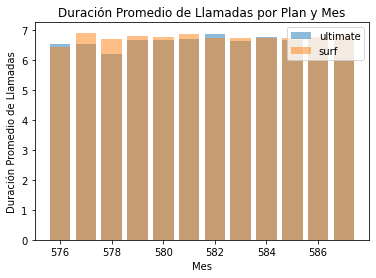

In [24]:
# Compare the average call duration for each plan and for each month. Draw a bar graph to visualize it.

df_merged = pd.merge(df_calls, df_users, on='user_id', how='inner')
df_merged['month'] = df_merged['month'].astype(int)
average_duration_per_month = df_merged.groupby(['plan', 'month'])['duration'].mean().reset_index()

for plan in df_users['plan'].unique():
    plan_data = average_duration_per_month[average_duration_per_month['plan'] == plan]
    plt.bar(plan_data['month'], plan_data['duration'], label=plan, alpha=0.5)

plt.xlabel('Month')
plt.ylabel('Average Call Duration')
plt.title('Average Call Duration by Plan and Month')
plt.legend()

plt.show()

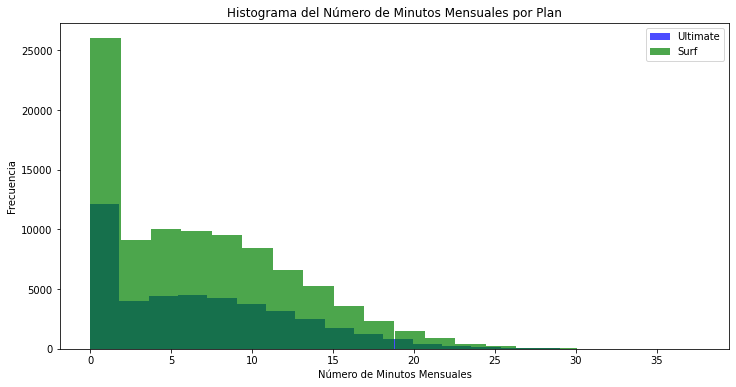

In [25]:
# Compare the number of monthly minutes that users of each plan need. Plot a histogram.

ultimate_data = df_tarifa[df_tarifa['plan'] == 'ultimate']
surf_data = df_tarifa[df_tarifa['plan'] == 'surf']

plt.figure(figsize=(12, 6))
plt.hist(ultimate_data['duration'], bins=20, alpha=0.7, label='Ultimate', color='blue')

plt.hist(surf_data['duration'], bins=20, alpha=0.7, label='Surf', color='green')

plt.title('Histogram of Number of Monthly Minutes per Plan')
plt.xlabel('Number of Monthly Minutes')
plt.ylabel('Frequency')
plt.legend()
plt.show()


[Calculate the mean and variable call duration to find out if users on different plans behave differently when making calls.]

In [26]:
# Calcula la media y la varianza de la duración mensual de llamadas.
monthly_duration_stats = df_tarifa.groupby('month_x')['duration'].agg(['mean', 'var']).reset_index()

print("Mean monthly call duration:", monthly_duration_stats['mean'].mean())
print("Monthly call duration variance:", monthly_duration_stats['var'].var())

Media de duración mensual de llamadas: 6.706903919866264
Varianza de duración mensual de llamadas: 0.49727189435077646


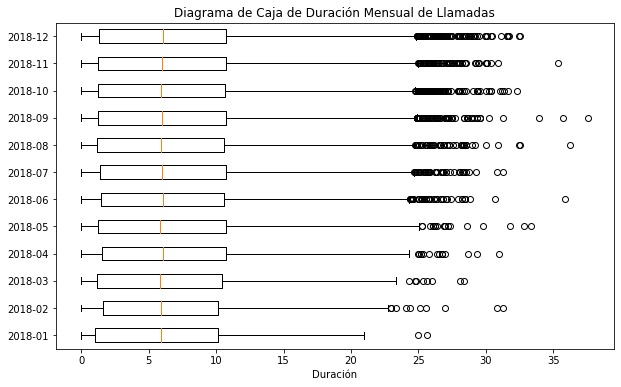

In [27]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

datos_boxplot = [df_tarifa[df_tarifa['month_x'] == mes]['duration'] for mes in monthly_duration_stats['month_x']]

plt.figure(figsize=(10, 6))
plt.boxplot(datos_boxplot, labels=monthly_duration_stats['month_x'], vert=False)
plt.title('Monthly Call Duration Box Plot')
plt.xlabel('Duration')

plt.show()

People with the surf plan frequently make more calls than ultimate users

### Messages

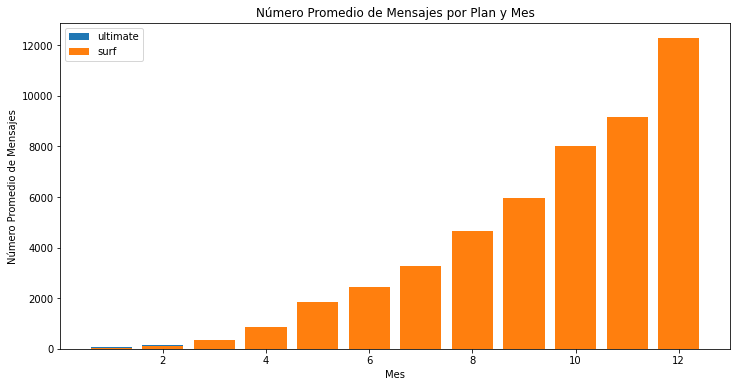

In [28]:
#It will buy the number of messages that users of each plan tend to send each month

df_messages_merged = pd.merge(df_messages, df_users, on='user_id', how='inner')
df_messages_merged['month'] = pd.to_datetime(df_messages_merged['message_date']).dt.month
average_messages_per_month = df_messages_merged.groupby(['plan', 'month'])['id'].count().reset_index()

plt.figure(figsize=(12, 6))
for plan in df_users['plan'].unique():
    plan_data = average_messages_per_month[average_messages_per_month['plan'] == plan]
    plt.bar(plan_data['month'], plan_data['id'], label=plan)

plt.xlabel('Month')
plt.ylabel('Average Number of Messages')
plt.title('Average Number of Messages per Plan and Month')
plt.legend()


plt.show()

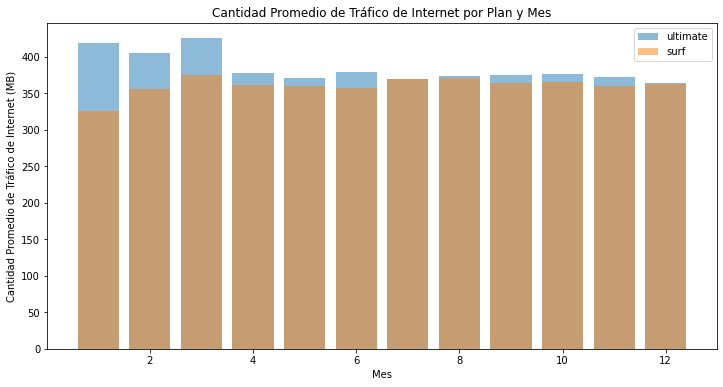

In [31]:
# Compares the amount of Internet traffic consumed by users per plan

df_internet_merged = pd.merge(df_internet, df_users, on='user_id', how='inner')
df_internet_merged['month'] = pd.to_datetime(df_internet_merged['session_date']).dt.month

average_internet_traffic_per_month = df_internet_merged.groupby(['plan', 'month'])['mb_used'].mean().reset_index()

plt.figure(figsize=(12, 6))
for plan in df_users['plan'].unique():
    plan_data = average_internet_traffic_per_month[average_internet_traffic_per_month['plan'] == plan]
    plt.bar(plan_data['month'], plan_data['mb_used'], label=plan, alpha=0.5)

plt.xlabel('Month')
plt.ylabel('Average Amount of Internet Traffic (MB)')
plt.title('Average Amount of Internet Traffic per Plan and Month')
plt.legend()


plt.show()

That there is a small difference in the use of internet data, but those on the ultimate plan are the ones that use it the most most months

### Internet

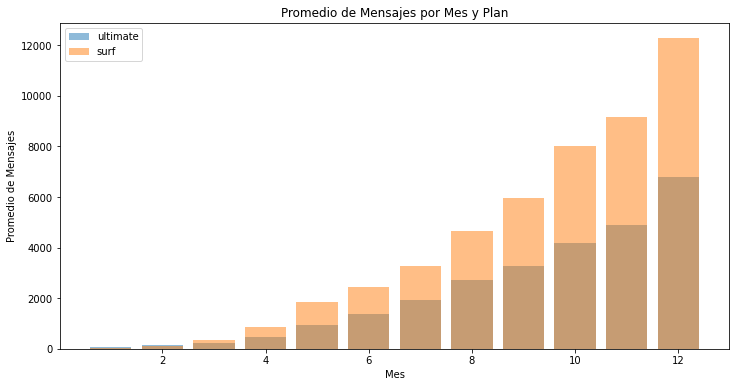

In [29]:
average_messages_per_month_plan = df_messages_merged.groupby(['plan', 'month'])['id'].count().reset_index()
plt.figure(figsize=(12, 6))
for plan in df_users['plan'].unique():
    plan_data = average_messages_per_month_plan[average_messages_per_month_plan['plan'] == plan]
    plt.bar(plan_data['month'], plan_data['id'], label=plan,alpha=0.5)
plt.xlabel('Month')
plt.ylabel('Message Average')
plt.title('Average Messages per Month and Plan')
plt.legend()

plt.show()

Yes, traffic increases a little for users of the ultimate plan

## Income

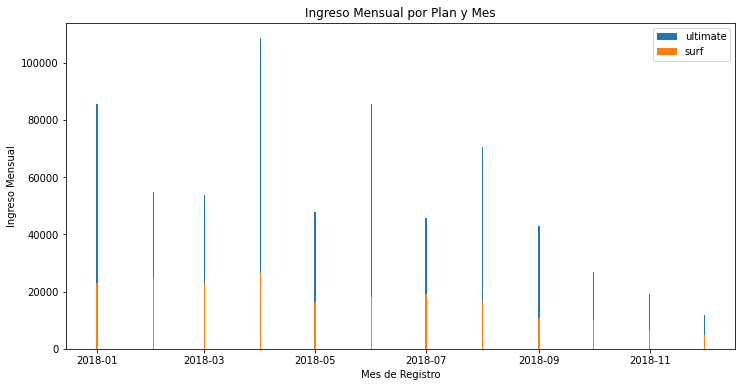

In [42]:
plt.figure(figsize=(12, 6))

for plan in df_users['plan'].unique():
    plan_data = monthly_income[df_users['user_id'].isin(df_users[df_users['plan'] == plan]['user_id'])]
    plt.bar(plan_data['reg_month'], plan_data['total_cost'], label=plan)

plt.xlabel('Registration Month')
plt.ylabel('Monthly Income')
plt.title('Monthly Income by Plan and Month')
plt.legend()
plt.show()

Based on the results obtained, it could be said that the clients of the surf plan generate more benefits compared to the users of the ultimate plan.


## Test statistical hypotheses

Null hypothesis:
There is no significant difference in data traffic between the Ultimate and Surf plans

alternative hypothesis
There is a significant difference in data traffic between the Ultimate and Surf plans

In [34]:
# Test the hypotheses

ultimate_traffic = df_internet_merged[df_internet_merged['plan'] == 'ultimate']['mb_used']
surf_traffic = df_internet_merged[df_internet_merged['plan'] == 'surf']['mb_used']
t_statistic, p_value = st.ttest_ind(ultimate_traffic, surf_traffic, equal_var=False)
alpha = 0.05

print(f"Estadística de prueba (t): {t_statistic}")
print(f"Valor p: {p_value}")

if p_value < alpha:
    print("We reject the null hypothesis.")
    print("There is a significant difference in data traffic between the Ultimate and Surf plans")
else:
    print("There is not enough evidence to reject the null hypothesis.")
    print("There is no significant difference in data traffic between the Ultimate and Surf plans")

Estadística de prueba (t): 4.896365068075602
Valor p: 9.78628405328808e-07
Rechazamos la hipótesis nula.
Hay una diferencia significativa en el tráfico de datos entre los planes Ultimate y Surf


Null hypothesis:
No significant difference in ages between NY-NJ regions and other regions

alternative hypothesis
There is a significant difference in ages between the NY-NJ regions, the mean ages in the NY-NJ region are not the same as the mean ages in other regions

In [35]:
# Test the hypotheses
ny_nj = df_users[df_users['city'].str.contains('NY-NJ', case=False)]['age']
other_regions = df_users[~df_users['city'].str.contains('NY-NJ', case=False)]['age']
t_statistic, p_value = st.ttest_ind(ny_nj, other_regions, equal_var=False)
alpha = 0.05

print(f"Estadística de prueba (t): {t_statistic}")
print(f"Valor p: {p_value}")

if p_value < alpha:
    print("We reject the null hypothesis")
    print("There is a significant difference in ages between the NY-NJ regions and other regions")
else:
    print("There is not enough evidence to reject the null hypothesis")
    print("There is no significant difference in ages between the NY-NJ regions and other regions")


Estadística de prueba (t): 0.21532038430841918
Valor p: 0.8299135301629786
No hay evidencia suficiente para rechazar la hipótesis nula
No hay diferencia significativa en las edades entre las regiones NY-NJ y otras regiones


## General conclusion

Surf plan users appear to be more active in terms of calls, while Ultimate plan users show higher internet data consumption and generate less profit.

These results can have important implications for adjusting marketing strategies in terms of services offered or prices according to the behaviors and preferences of users in each plan.

Geographic location (NY-NJ vs. other regions) does not appear to be a significant factor in average income differences.
